In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_excel('Results 17012020.xlsx',sheet_name='ODGFP',index_col=0)

In [5]:
df.head()

,A5,A8,B1,B3,B10,C2,C5,C8,C9,C10,...,E3,F2,F3,F9,G6,G8,G10,H1,H2,H8
Time,,,,,,,,,,,,,,,,,,,,,
00:06:22,887.804878,894.736842,930.000000,973.684211,853.773585,942.105263,973.404255,903.553299,918.781726,853.658537,...,942.408377,936.170213,914.141414,882.352941,937.500000,885.572139,834.905660,848.101266,776.315789,898.989899
00:16:22,834.905660,818.181818,1043.269231,902.564103,810.810811,969.387755,928.934010,834.951456,817.307692,813.084112,...,909.547739,959.595960,855.769231,831.775701,911.764706,808.411215,746.606335,824.000000,721.991701,890.476190
00:26:22,779.735683,727.659574,913.636364,888.888889,776.371308,841.346154,928.909953,809.954751,806.306306,781.659389,...,841.121495,820.754717,799.107143,740.259740,830.275229,750.000000,766.949153,739.622642,669.230769,860.986547
00:36:22,730.612245,685.258964,767.932489,805.429864,678.431373,763.392857,750.000000,726.890756,736.401674,692.307692,...,731.601732,817.391304,687.242798,725.099602,718.487395,677.419355,682.352941,691.228070,615.658363,748.953975
00:46:22,656.370656,639.097744,669.291339,757.322176,615.942029,746.887967,713.709677,624.031008,661.538462,651.685393,...,709.677419,714.859438,652.671756,626.373626,717.054264,651.685393,621.818182,588.996764,548.172757,670.588235


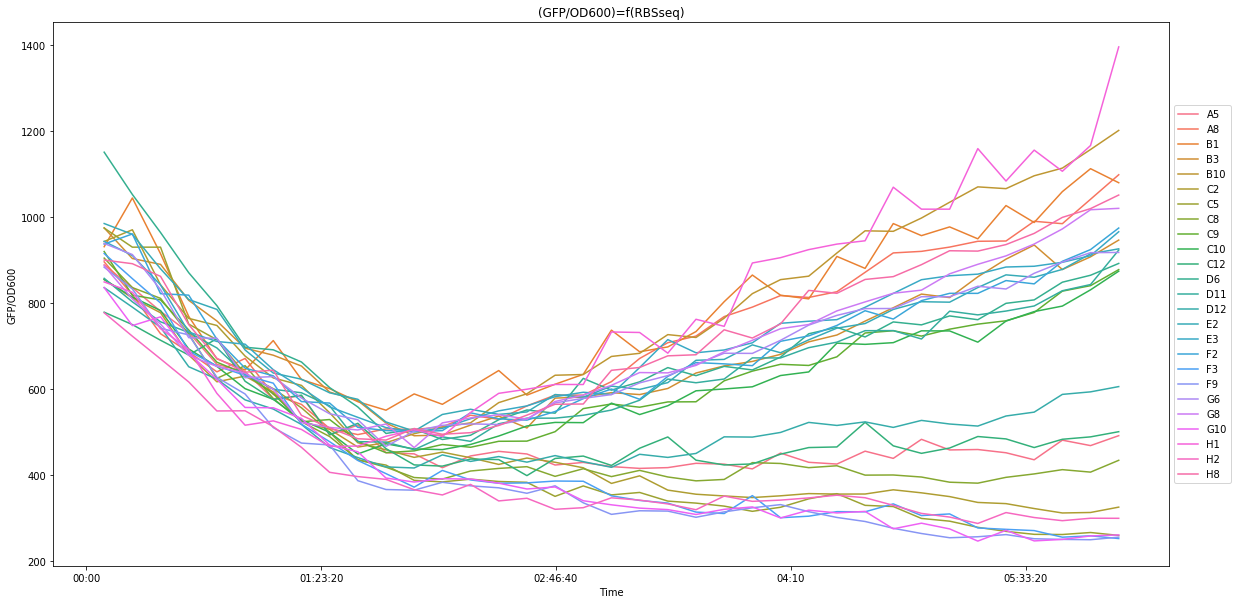

In [29]:
plt.figure(figsize=(20, 10))
g=sns.lineplot(data=df,dashes=False)
plt.ylabel('GFP/OD600')
plt.title('(GFP/OD600)=f(RBSseq)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

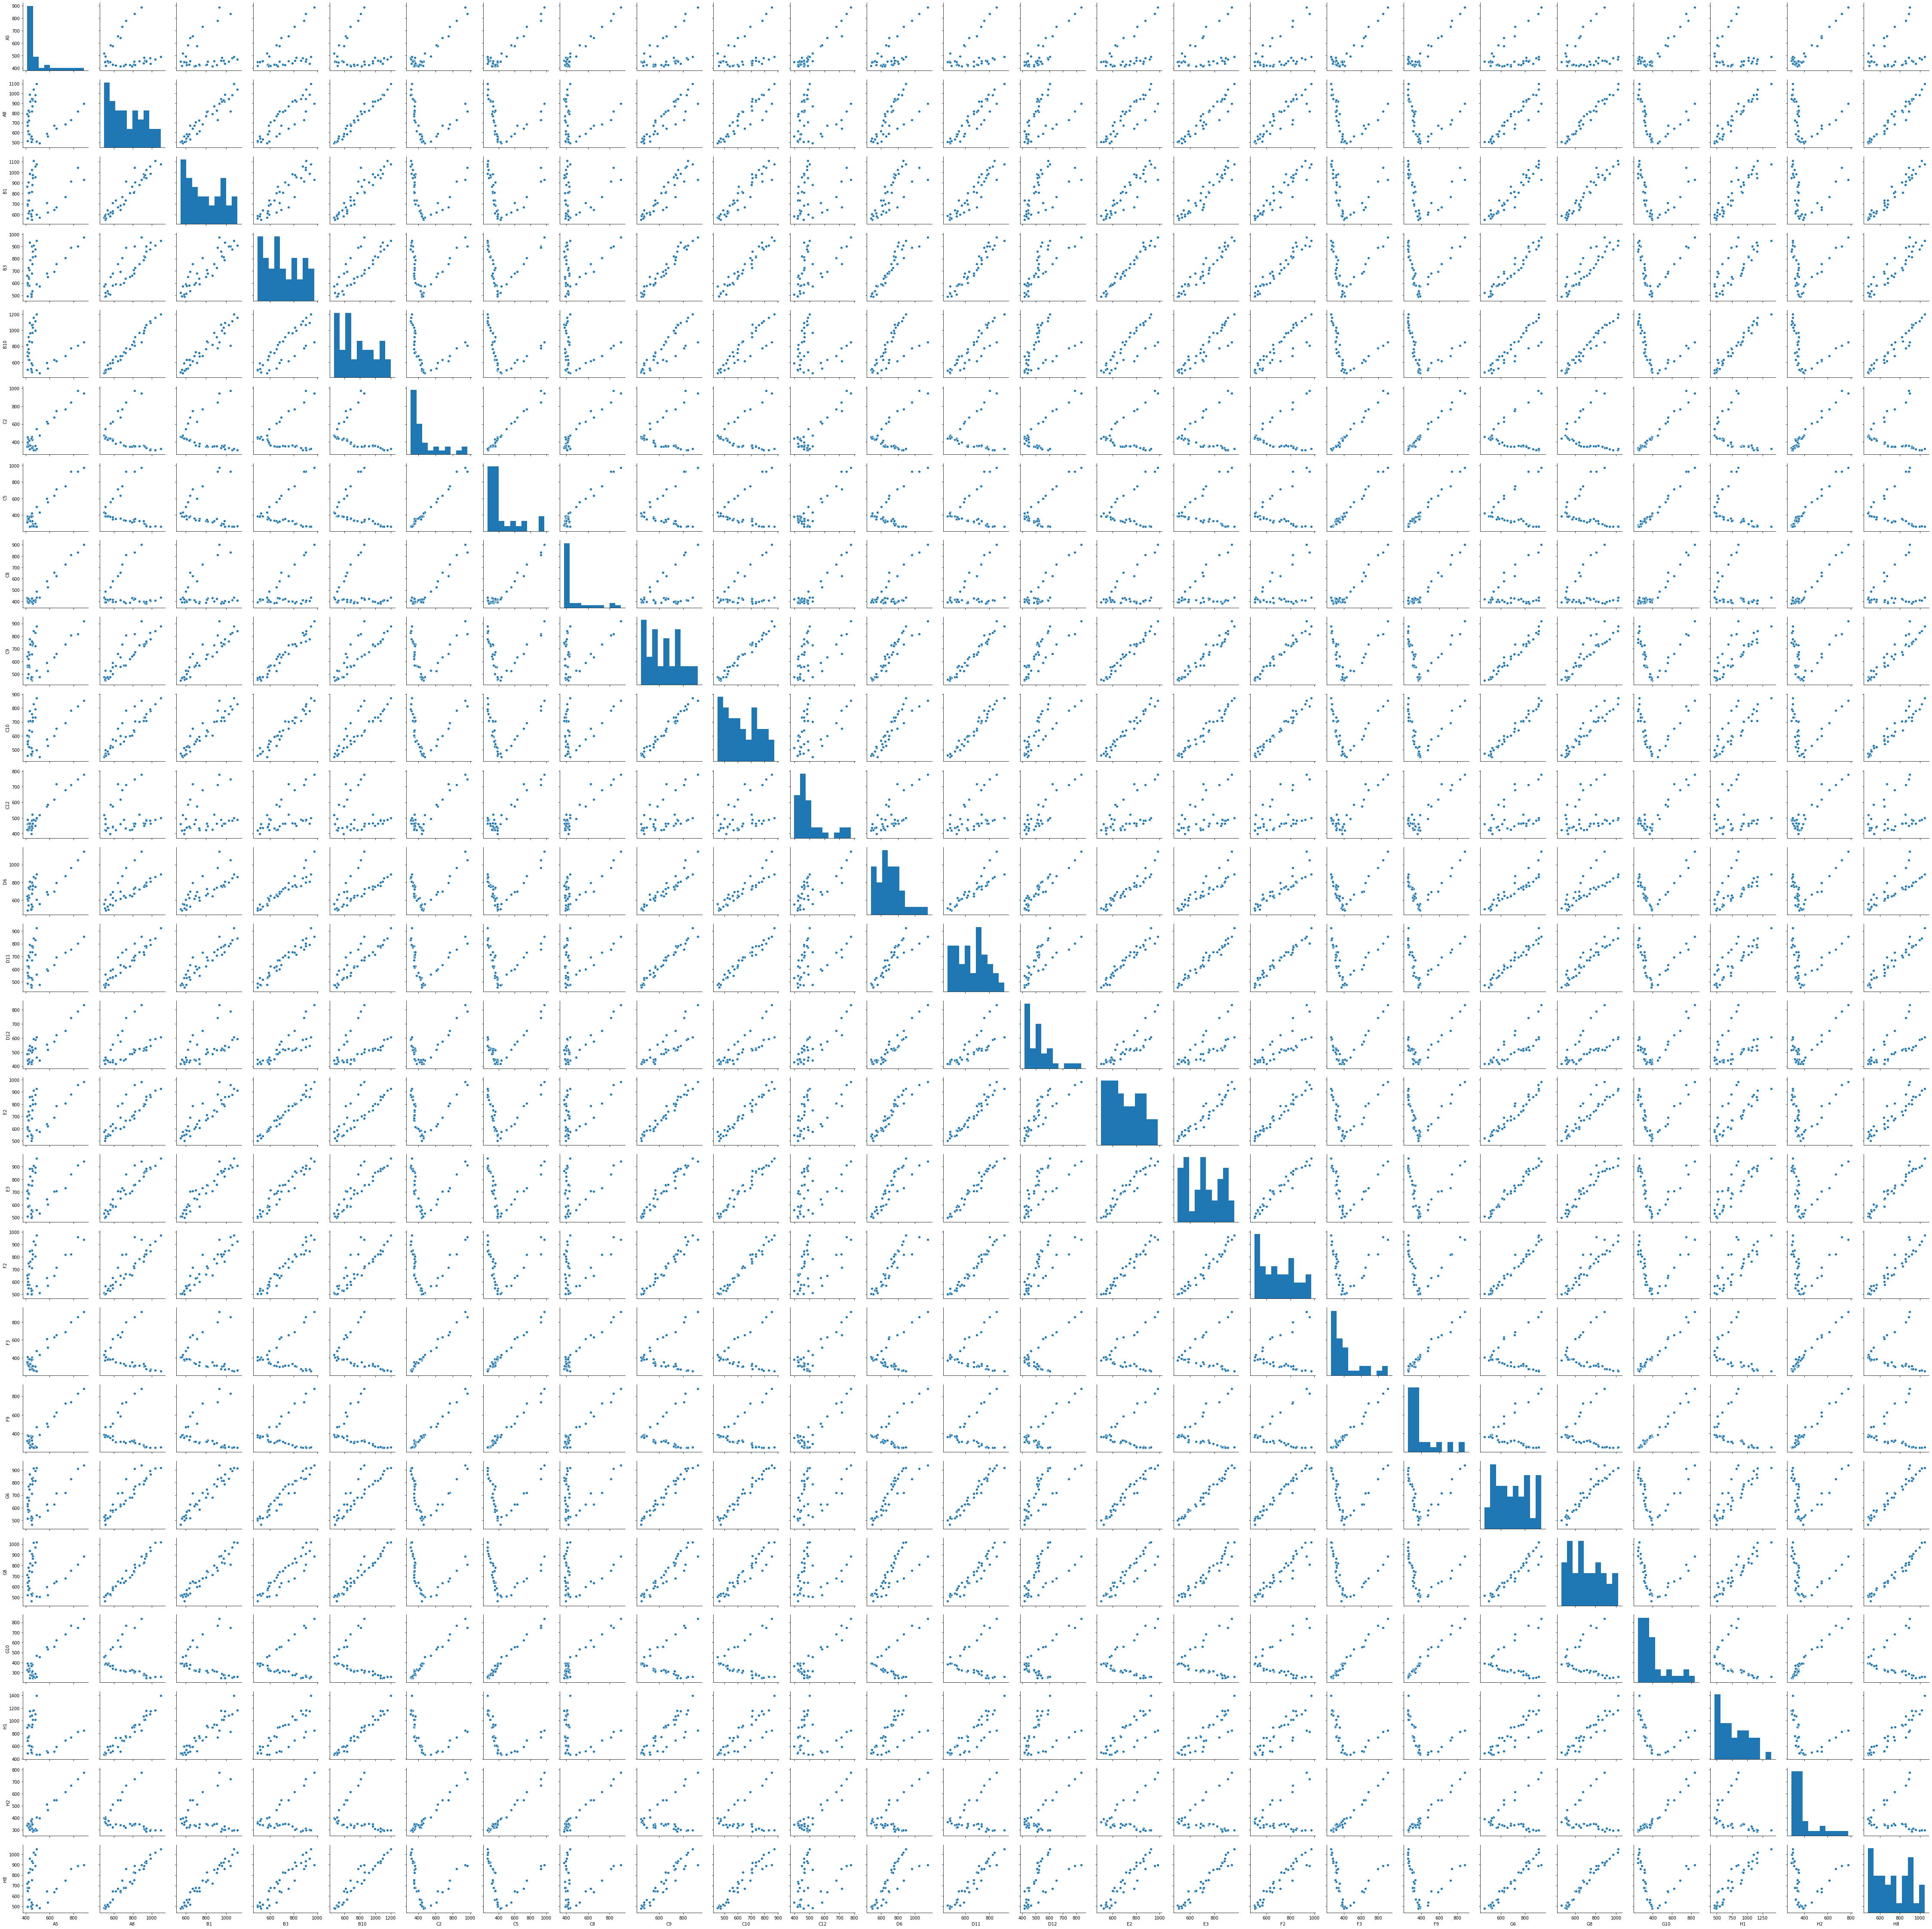

In [30]:
sns.pairplot(df)